# Evaluatie deep learning models

In [1]:
import pandas as pd
import warnings
from keras.models import Sequential, Model
import matplotlib.pyplot as plt
from keras.utils import pad_sequences
from keras.preprocessing.text import Tokenizer
from keras.layers import Dense, Embedding, Flatten, Conv1D, MaxPooling1D, SimpleRNN, LSTM
from keras.datasets import imdb

warnings.filterwarnings('ignore')

## Data

Voor het evalueren van de modellen gebruik de twitter semtiment dataset van kaggle. De rijen aan data zijn tweets en daarbij een binaire target, waarmeer wordt aangegeven of het positief is of niet.

In [2]:
# dataset laden
(x_train, y_train), (x_test, y_test) = imdb.load_data(num_words = 10000)

In [3]:
x_train = pad_sequences(x_train, maxlen=30)
x_test = pad_sequences(x_test, maxlen=30)

In [4]:
x_val_set = x_train[:10000]
x_train_set = x_train[10000:]

y_val_set = y_train[:10000]
y_train_set = y_train[10000:]

In [5]:
print(x_train_set.shape, y_train_set.shape)

(15000, 30) (15000,)


## Dense

In [6]:
dense_model = Sequential()
# een embedding laag is een laag gemaakt voor text data. 
# de embedding past dan elke word die megegeven is in een unieke waarde aan.
dense_model.add(Embedding(10000, 16, input_length=30))
# aan gezien embedding laag multidimensionaal is gebruiken we de flatten layer om de data 1 dimensionaal te maken
# zodat het in de dense layer kan
dense_model.add(Flatten())
# Een dense laag is een type laag in een neurale netwerk waarbij elke neuron in deze laag verbonden is met elke neuron in de volgende laag.
dense_model.add(Dense(units=32, activation='relu'))
dense_model.add(Dense(units=1, activation='sigmoid'))

dense_model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 30, 16)            160000    
                                                                 
 flatten (Flatten)           (None, 480)               0         
                                                                 
 dense (Dense)               (None, 32)                15392     
                                                                 
 dense_1 (Dense)             (None, 1)                 33        
                                                                 
Total params: 175,425
Trainable params: 175,425
Non-trainable params: 0
_________________________________________________________________


In [7]:
dense_model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [8]:
dense_history = dense_model.fit(x_train, y_train, epochs=10, validation_data=(x_val_set, y_val_set))

Epoch 1/10
782/782 [==============================] - 3s 3ms/step - loss: 0.5352 - accuracy: 0.7145 - val_loss: 0.3281 - val_accuracy: 0.8692
Epoch 2/10
782/782 [==============================] - 2s 2ms/step - loss: 0.3199 - accuracy: 0.8647 - val_loss: 0.1612 - val_accuracy: 0.9572
Epoch 3/10
782/782 [==============================] - 2s 2ms/step - loss: 0.1459 - accuracy: 0.9514 - val_loss: 0.0454 - val_accuracy: 0.9920
Epoch 4/10
782/782 [==============================] - 2s 2ms/step - loss: 0.0416 - accuracy: 0.9896 - val_loss: 0.0111 - val_accuracy: 0.9987
Epoch 5/10
782/782 [==============================] - 2s 2ms/step - loss: 0.0092 - accuracy: 0.9988 - val_loss: 0.0034 - val_accuracy: 0.9999
Epoch 6/10
782/782 [==============================] - 2s 2ms/step - loss: 0.0026 - accuracy: 0.9998 - val_loss: 0.0012 - val_accuracy: 0.9999
Epoch 7/10
782/782 [==============================] - 2s 2ms/step - loss: 0.0014 - accuracy: 0.9999 - val_loss: 7.7231e-04 - val_accuracy: 0.9999
Ep

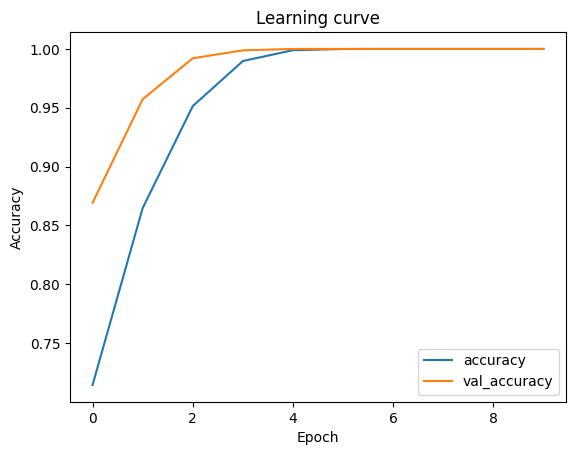

In [9]:
plt.plot(dense_history.history['accuracy'], label='accuracy')
plt.plot(dense_history.history['val_accuracy'], label = 'val_accuracy')
plt.title("Learning curve")
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(loc='best')

In [10]:
dense_scores = dense_model.evaluate(x_test, y_test)
print("Accuracy: ", dense_scores[1])

782/782 [==============================] - 1s 1ms/step - loss: 1.4020 - accuracy: 0.7480
Accuracy:  0.7480000257492065


## 1D Convolutie

In [11]:
con_model = Sequential()
con_model.add(Embedding(10000, 16, input_length=30))
# Een conv1d is een laag in een neurale netwerk gebruikt voor 1d convolutionele berekeningen.
# Het bestaat uit filters waarbij elke filter wordt toegepast op een gedeelte van de input. 
# Elk filter leert daarmee een bepaalde feature te decteren
con_model.add(Conv1D(32, 5, activation = 'relu'))
# een pooling laag is een laag dat gebruikt wordt om de grootte van de input te verkleinen, het verminderen
# en de belangrijkste features te houden
# bij max pooling wordt de grootste waren uit een gebied van de input gebruikt als output
con_model.add(MaxPooling1D(3))
con_model.add(Conv1D(32, 5, activation = 'relu'))
con_model.add(Flatten())
con_model.add(Dense(units=32, activation='relu'))
con_model.add(Dense(units=1, activation='sigmoid'))

con_model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_1 (Embedding)     (None, 30, 16)            160000    
                                                                 
 conv1d (Conv1D)             (None, 26, 32)            2592      
                                                                 
 max_pooling1d (MaxPooling1D  (None, 8, 32)            0         
 )                                                               
                                                                 
 conv1d_1 (Conv1D)           (None, 4, 32)             5152      
                                                                 
 flatten_1 (Flatten)         (None, 128)               0         
                                                                 
 dense_2 (Dense)             (None, 32)                4128      
                                                      

In [12]:
con_model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [13]:
con_history = con_model.fit(x_train, y_train, epochs=10, validation_data=(x_val_set, y_val_set))

Epoch 1/10
782/782 [==============================] - 4s 4ms/step - loss: 0.5625 - accuracy: 0.6892 - val_loss: 0.3780 - val_accuracy: 0.8437
Epoch 2/10
782/782 [==============================] - 3s 4ms/step - loss: 0.3914 - accuracy: 0.8226 - val_loss: 0.2486 - val_accuracy: 0.9085
Epoch 3/10
782/782 [==============================] - 3s 4ms/step - loss: 0.2581 - accuracy: 0.8946 - val_loss: 0.1182 - val_accuracy: 0.9687
Epoch 4/10
782/782 [==============================] - 3s 4ms/step - loss: 0.1127 - accuracy: 0.9604 - val_loss: 0.0526 - val_accuracy: 0.9841
Epoch 5/10
782/782 [==============================] - 3s 4ms/step - loss: 0.0429 - accuracy: 0.9863 - val_loss: 0.0248 - val_accuracy: 0.9933
Epoch 6/10
782/782 [==============================] - 3s 4ms/step - loss: 0.0159 - accuracy: 0.9953 - val_loss: 0.0074 - val_accuracy: 0.9986
Epoch 7/10
782/782 [==============================] - 3s 4ms/step - loss: 0.0137 - accuracy: 0.9958 - val_loss: 0.0068 - val_accuracy: 0.9978
Epoch 

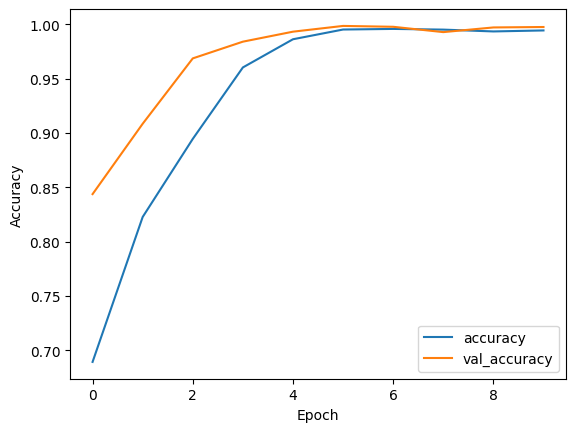

In [14]:
plt.plot(con_history.history['accuracy'], label='accuracy')
plt.plot(con_history.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(loc='best')

In [15]:
con_scores = con_model.evaluate(x_test, y_test)
print("Accuracy: ", con_scores[1])

782/782 [==============================] - 1s 1ms/step - loss: 1.8374 - accuracy: 0.7252
Accuracy:  0.7251600027084351


## SimpleRNN

Een SimpleRNN-laag is een soort van recurrente neurale netwerk (RNN) laag die wordt gebruikt voor het verwerken van sequentiële gegevens, zoals tijdreeksen of tekst. De term "simple" verwijst naar het feit dat de laag een enkele recurrente verbinding heeft, wat betekent dat de output van de laag op een bepaalde tijdstap alleen afhankelijk is van de vorige tijdstap, in tegenstelling tot meer complexe RNN's zoals LSTM en GRU die meerdere recurrente verbindingen hebben.

Een SimpleRNN-laag bevat een aantal neuronen, waarbij elke neuron een enkel element van de inputreeks verwerkt. De output van elke neuron wordt doorgegeven als input aan de volgende neuron, samen met de vorige staat van de neuron. Dit maakt het netwerk in staat om een interne representatie van de inputreeks op te bouwen over de tijd en beslissingen te nemen op basis van de gehele reeks.

SimpleRNN is nuttig voor taken zoals taalherkenning, speech-to-text, en tijdreeksanalyse.

In [16]:
rnn_model = Sequential()
rnn_model.add(Embedding(10000, 16, input_length=30))
# bij een rnn netwerk wordt er gebruik gemaakt van recurrent verbindingen
# in het geval van een simpel rnn heeft de laag een enkele recurrrent verbinding heeft
# dit betekent dat de output van de laag op alleen op een bepaalde tijstap afhankelijk is van de vorige
# elk simpel rnn laag bevat een aantal neuronen waarbij een enkel elementen van de input verwerkt
# de output wordt door gegeven als input aan de volgende neuron samen met de vorige staat van de neuron
rnn_model.add(SimpleRNN(32, return_sequences = True))
rnn_model.add(SimpleRNN(32))
rnn_model.add(Dense(units=32, activation='relu'))
rnn_model.add(Dense(units=1, activation='sigmoid'))

rnn_model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_2 (Embedding)     (None, 30, 16)            160000    
                                                                 
 simple_rnn (SimpleRNN)      (None, 30, 32)            1568      
                                                                 
 simple_rnn_1 (SimpleRNN)    (None, 32)                2080      
                                                                 
 dense_4 (Dense)             (None, 32)                1056      
                                                                 
 dense_5 (Dense)             (None, 1)                 33        
                                                                 
Total params: 164,737
Trainable params: 164,737
Non-trainable params: 0
_________________________________________________________________


In [17]:
rnn_model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [18]:
rnn_history = rnn_model.fit(x_train, y_train, epochs=10, validation_data=(x_val_set, y_val_set))

Epoch 1/10
782/782 [==============================] - 10s 11ms/step - loss: 0.5798 - accuracy: 0.6659 - val_loss: 0.3709 - val_accuracy: 0.8427
Epoch 2/10
782/782 [==============================] - 8s 10ms/step - loss: 0.3876 - accuracy: 0.8270 - val_loss: 0.2529 - val_accuracy: 0.8981
Epoch 3/10
782/782 [==============================] - 8s 11ms/step - loss: 0.2659 - accuracy: 0.8944 - val_loss: 0.1451 - val_accuracy: 0.9565
Epoch 4/10
782/782 [==============================] - 9s 11ms/step - loss: 0.1403 - accuracy: 0.9478 - val_loss: 0.0857 - val_accuracy: 0.9769
Epoch 5/10
782/782 [==============================] - 8s 10ms/step - loss: 0.0695 - accuracy: 0.9760 - val_loss: 0.0450 - val_accuracy: 0.9841
Epoch 6/10
782/782 [==============================] - 8s 10ms/step - loss: 0.0388 - accuracy: 0.9866 - val_loss: 0.0220 - val_accuracy: 0.9931
Epoch 7/10
782/782 [==============================] - 8s 10ms/step - loss: 0.0302 - accuracy: 0.9898 - val_loss: 0.0226 - val_accuracy: 0.992

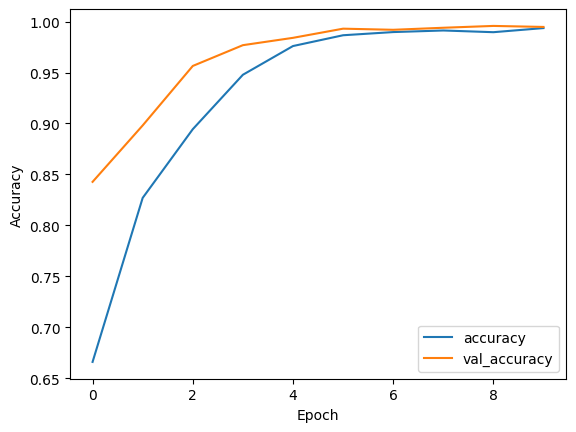

In [19]:
plt.plot(rnn_history.history['accuracy'], label='accuracy')
plt.plot(rnn_history.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(loc='best')

In [20]:
rnn_scores = rnn_model.evaluate(x_test, y_test)
print("Accuracy: ", rnn_scores[1])

782/782 [==============================] - 2s 3ms/step - loss: 1.5219 - accuracy: 0.7379
Accuracy:  0.7378799915313721
